In [3]:
import sys
import os
import glob
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.hh_decomp import window_tukey, window_field
from scripts.common import *

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/512x724x256/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(-Ly/2.,Ly/2.,Ny)

flist = glob.glob(directory+"*pstrainFilt*")
flist.sort()
print([f.split('/')[-1] for f in flist])

tlist,dlist,rates = growth_rates(directory+'shearlayer_')


Params for this run:
	Mc = 0.2
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 150.0x200.0x75.0
['shearlayer_pstrainFilt_0113.h5']


In [4]:
hf = h5py.File(flist[-1], 'r')
hf.keys()

[u'NX',
 u'NY',
 u'NZ',
 u'P11',
 u'P12',
 u'P22',
 u'count',
 u'p',
 u'time',
 u'x',
 u'y',
 u'z']

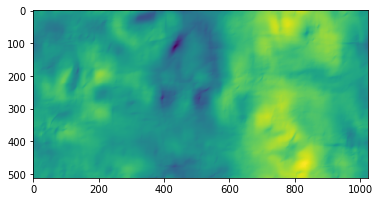

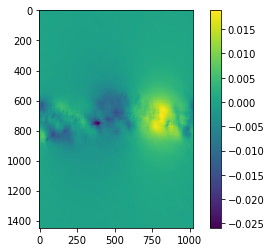

In [80]:
p=hf['p']
# ps = hf['P22']
plt.imshow(np.transpose(np.squeeze(p[:,Ny/2,:])))
plt.figure()
plt.imshow(np.transpose(np.squeeze(p[:,:,0])))
plt.colorbar()

[[1.         0.12145782]
 [0.12145782 1.        ]]


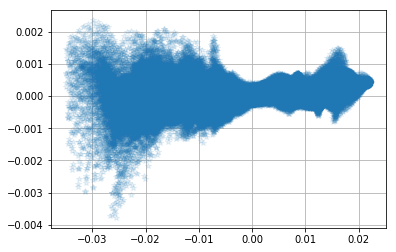

In [84]:
# correlation coeff
dat1=hf['p']
dat2=hf['P12']

itop = Ny/2-5
ibot = Ny/2+5
dat1 = np.array(dat1[:,itop:ibot,:]).flatten()
dat2 = np.array(dat2[:,itop:ibot,:]).flatten()
Cij = np.corrcoef(dat1,dat2)
print(Cij)

plt.plot(dat1,dat2,'*',alpha=0.1)
plt.grid(True)



(array([5.81218590e-03, 8.80131008e-03, 1.11261844e-02, 1.47795584e-02,
        1.66062454e-02, 1.94293072e-02, 2.25844938e-02, 2.92269920e-02,
        3.08876165e-02, 3.95228641e-02, 4.89884240e-02, 6.09449207e-02,
        7.65547915e-02, 8.98397878e-02, 1.07940595e-01, 1.26705653e-01,
        1.46467085e-01, 1.84495387e-01, 2.16047253e-01, 2.75663674e-01,
        3.61850088e-01, 4.38404880e-01, 5.08649298e-01, 5.83045277e-01,
        6.57441257e-01, 7.91453657e-01, 9.80432731e-01, 1.13121744e+00,
        1.29146771e+00, 1.69616191e+00, 1.96999890e+00, 2.26376338e+00,
        3.07730334e+00, 4.27345120e+00, 6.47427691e+00, 7.79596798e+00,
        8.46320692e+00, 9.74919457e+00, 1.10358465e+01, 1.28108880e+01,
        1.44683574e+01, 1.70160876e+01, 1.83178512e+01, 2.04471039e+01,
        2.34222789e+01, 2.75177111e+01, 3.07966143e+01, 3.47704888e+01,
        3.84799919e+01, 4.20279163e+01, 4.32873339e+01, 4.46907277e+01,
        5.01775973e+01, 5.31557613e+01, 5.27606987e+01, 5.336051

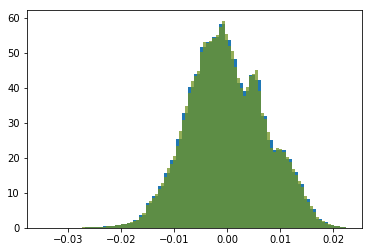

In [26]:
itop = Ny/2+10
ibot = Ny/2-10
p = hf['p'][:,ibot:itop,:]
plt.hist(p.flatten(), bins=50,density=True)
plt.hist(p.flatten(), bins=100,density=True,alpha=0.5)
plt.hist(p.flatten(), bins=100,density=True,alpha=0.5)